# **Aprendizaje no supervisado**

## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Vamos a leer y realizar una exploración inicial de nuestros datos


In [ ]:
df = pd.read_csv('/content/Dataset_wine/wine.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Estadisticas básicas

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Boxplots

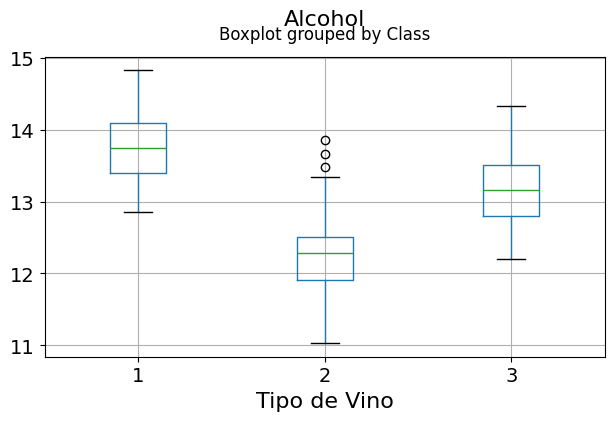

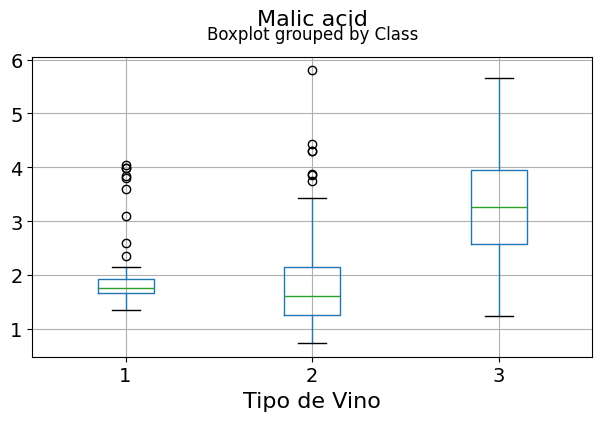

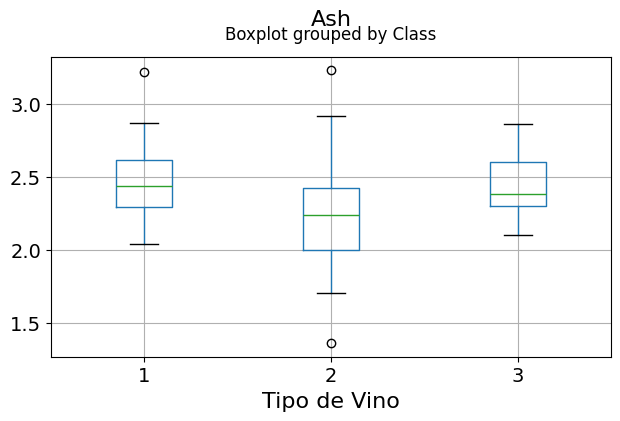

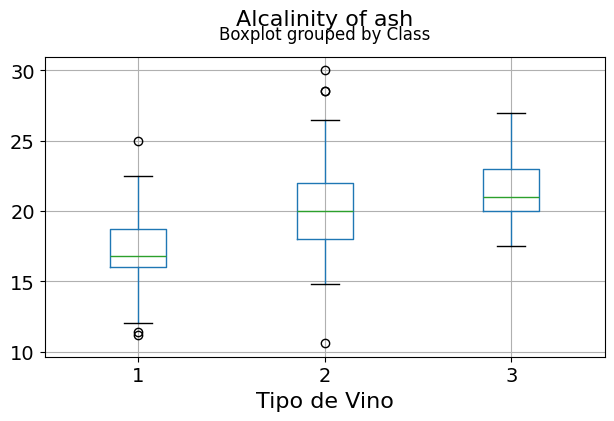

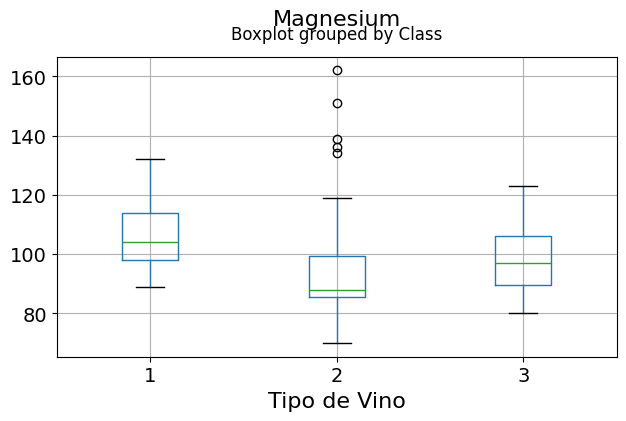

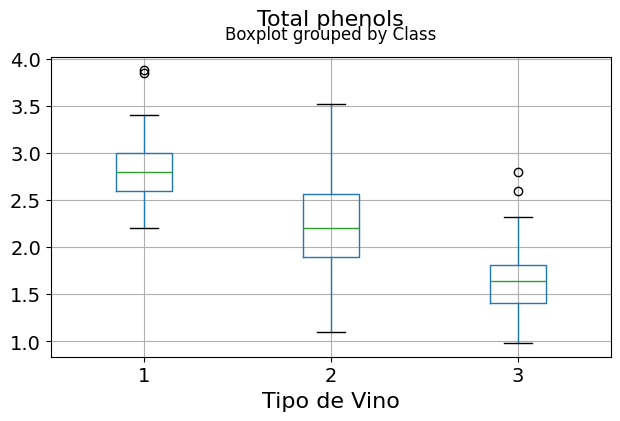

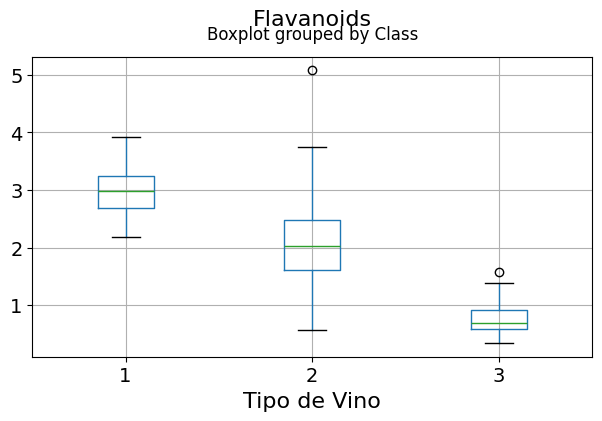

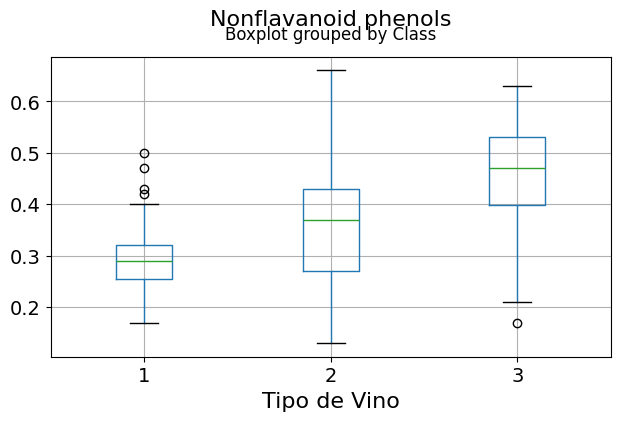

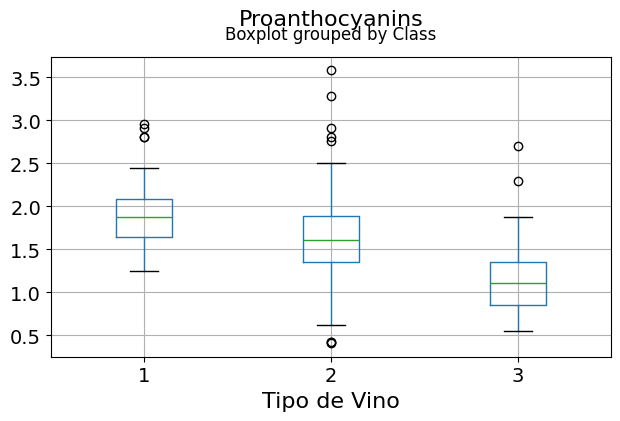

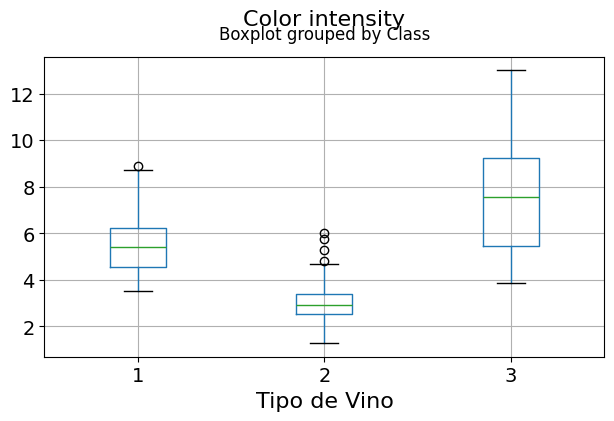

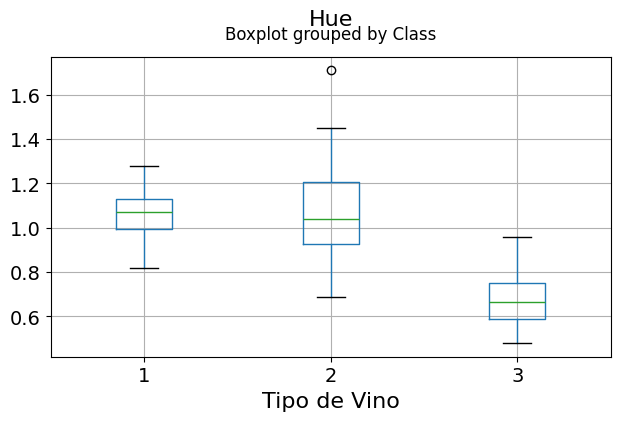

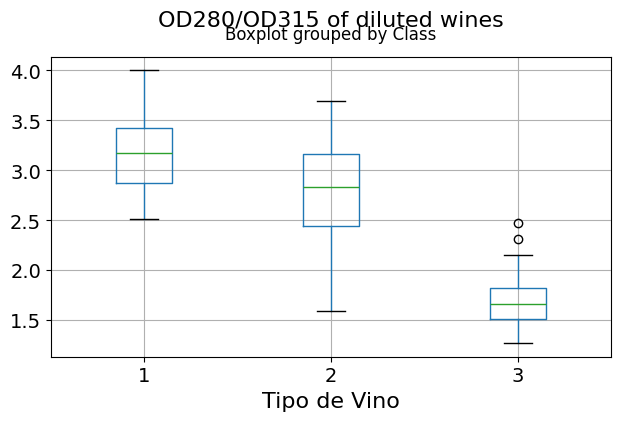

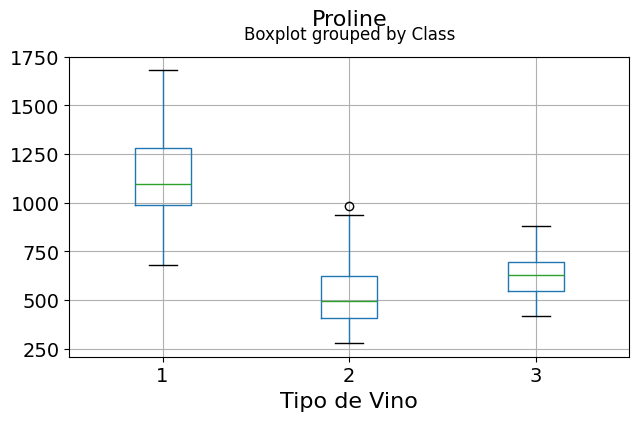

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Tipo de Vino", fontsize=16)

**Se puede ver que algunas características diferencian los tipos de vino de manera bastante clara**. Por ejemplo, la Alcalinidad, los Fenoles Totales o los Flavonoides producen diagramas de caja con medianas bien separadas, lo que indica claramente las clases de vino.

A continuación se muestra un ejemplo de separación de clases utilizando dos variables.

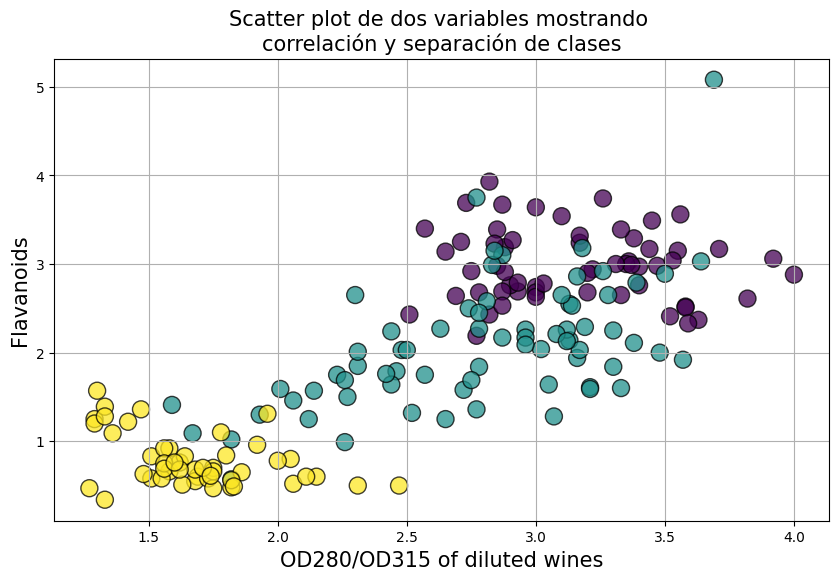

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

#### Como sabes si todas las caracteristicas son independientes? *Una matrix de covariance*

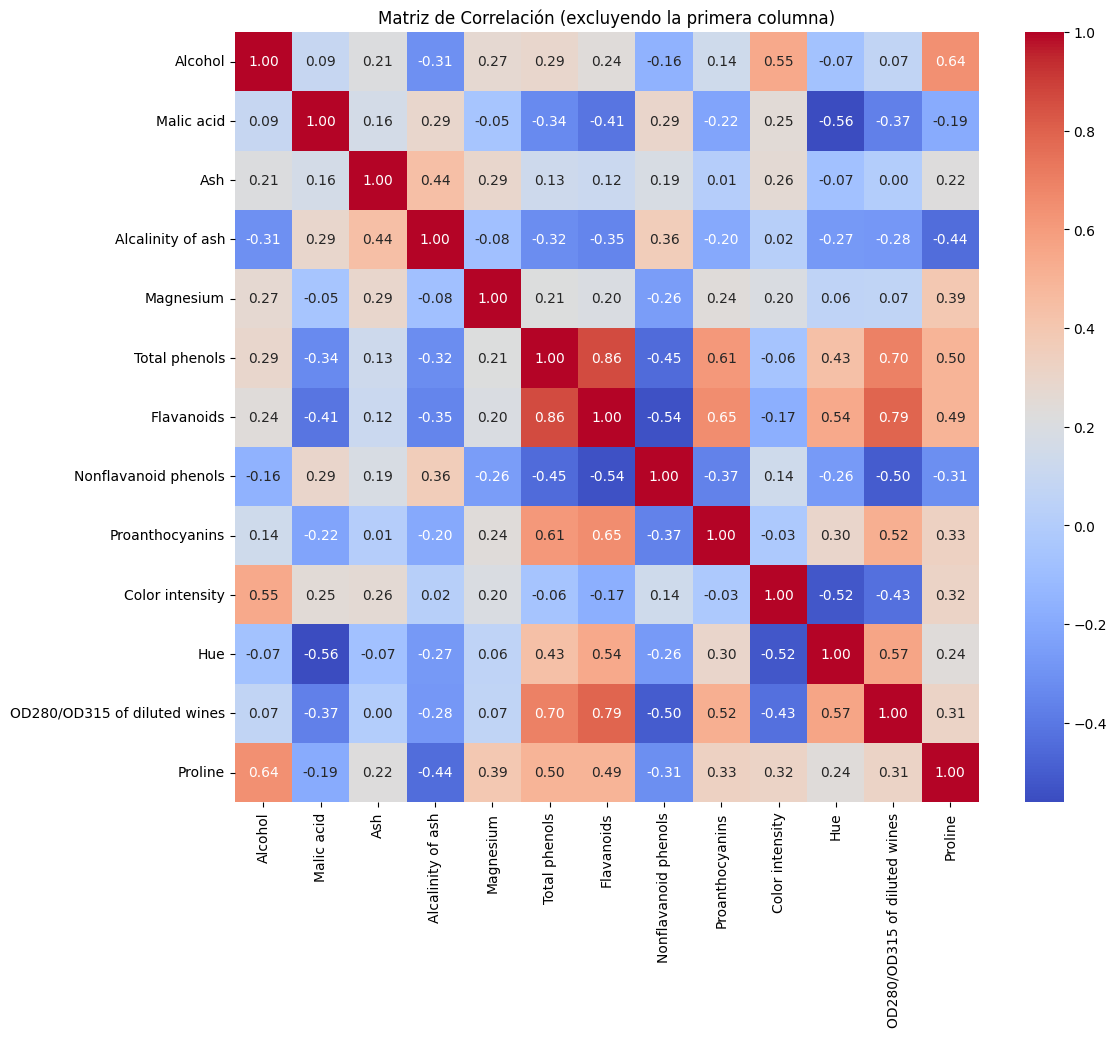

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()


Interpretación: Se puede observar que existe una buena correlación entre varias características, es decir, no son independientes entre sí, es decir, existe redundancia de información.

## Análisis de componentes principales


In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
nuevo_df = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(nuevo_df)

Caracteristicas seleccionadas para el vector de caracteristicas
[1 0]


<ipython-input-77-4c3ec7613a18>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)


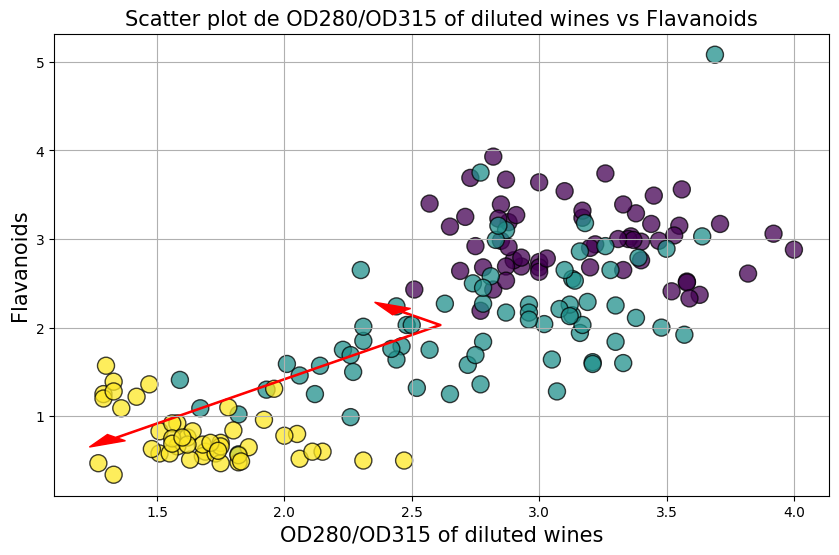

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

centroide = np.mean(nuevo_df, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(nuevo_df['OD280/OD315 of diluted wines'],nuevo_df['Flavanoids'], c=df['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Scatter plot de OD280/OD315 of diluted wines vs Flavanoids", fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines", fontsize=15)
plt.ylabel("Flavanoids", fontsize=15)

for i in range(pca.n_componentes):
  vector = pca.vectores_propios[:, i] * pca.valores_propios[i]
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)

plt.show()

### Normalización de datos
Recuerde que PCA requiere escalamiento/normalización de los datos para funcionar correctamente (eliminar la variabilidad de escala entre las caracteristicas)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### Análisis de PCA

In [ ]:
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [ ]:
porcentaje_explicacion_varianza = pca.valores_propios/np.sum(pca.valores_propios) * 100

#### Grafica explicando el % de de explicación de la varianza de cada componente

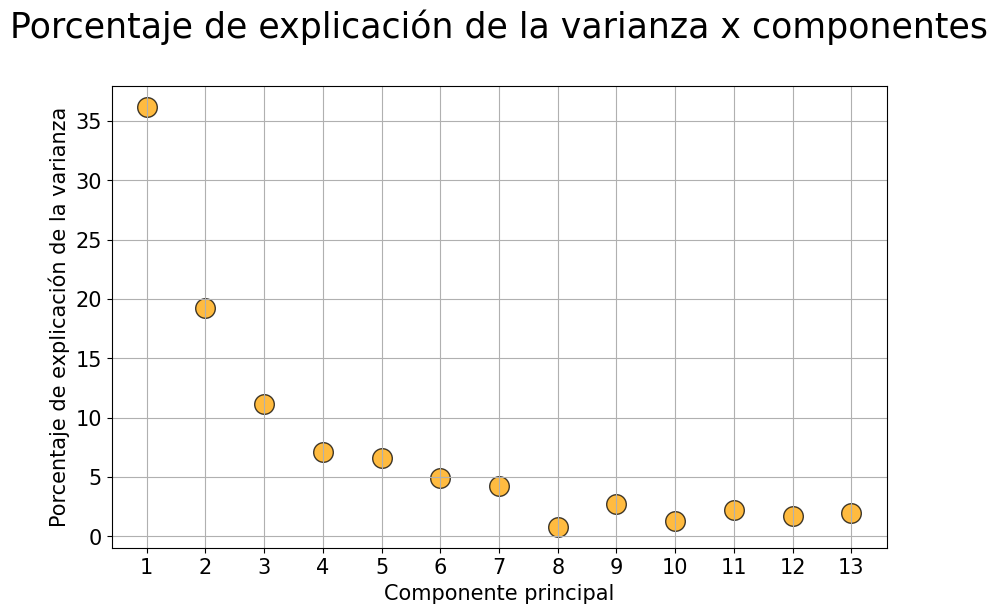

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(porcentaje_explicacion_varianza))],
            y=porcentaje_explicacion_varianza,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Porcentaje de explicación de la varianza x componentes\n",fontsize=25)
plt.xlabel("Componente principal",fontsize=15)
plt.xticks([i+1 for i in range(len(porcentaje_explicacion_varianza))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Porcentaje de explicación de la varianza",fontsize=15)
plt.show()

****La gráfica anterior indica que el primer componente principal explica aproximadamente el 36% de la varianza total de los datos y el segundo componente explica un 20% adicional. Por lo tanto, si solo consideramos los dos primeros componentes, juntos explican el 56 % de la varianza total.**

### Separación de tipos de vino utilizando solo los 2 mejores componentes

In [ ]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1
0,-3.316751,1.443463
1,-2.209465,-0.333393
2,-2.516740,1.031151
3,-3.757066,2.756372
4,-1.008908,0.869831
5,-3.050254,2.122401
6,-2.449090,1.174850
7,-2.059437,1.608963
8,-2.510874,0.918071
9,-2.753628,0.789438


#### Grafica de las dos columnas de este conjunto de datos transformados, con el color establecido en la etiqueta de clase de vino

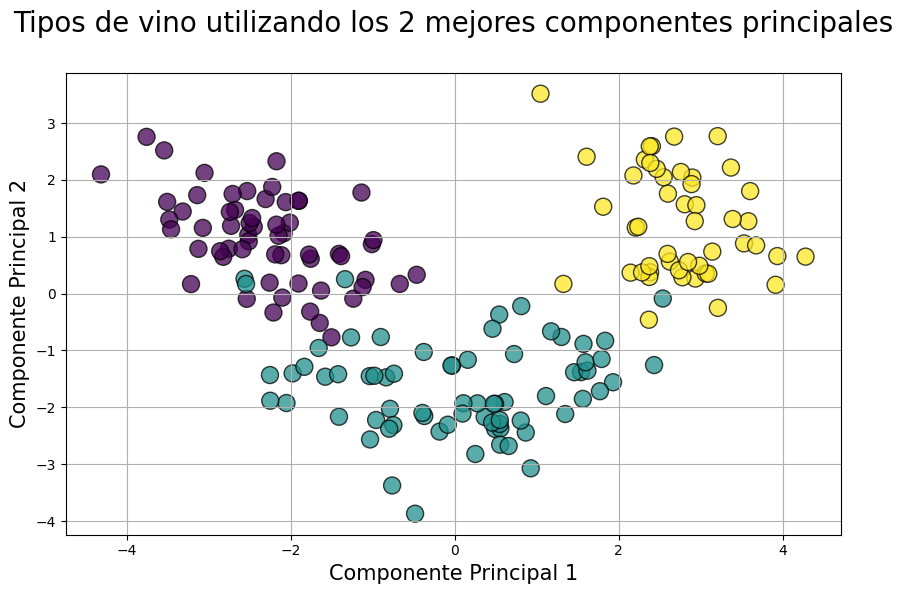

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 2 mejores componentes principales\n",fontsize=20)
plt.xlabel("Componente Principal 1",fontsize=15)
plt.ylabel("Componente Principal 2",fontsize=15)
plt.show()

#**Taller**

1. La empresa Vinos Zungo SA ha liberado un nuevo tipo de vino a base de banano. Luego de llevarlo al laboratorio de analisis de alimento se determinó la siguiente composición para este número producto:

*   Alcohol = 14.03
*   Malic acid = 1.71
*   Ash = 2.41
*   Alcalinity of ash = 15.5
*   Magnesium = 126
*   Total phenols = 2.79
*   Flavanoids = 3.05
*   Nonflavanoid phenols = 0.3
*   Proanthocyanins = 2.3
*   Color intensity = 5.57
*   Hue = 1.04
*   D280/OD315 of diluted wines = 3.82
*  	Proline = 1062

Dado los resultados de laboratorio, a cual tipo de vino pertenece?

# ACTIVIDAD #1

## Se carga el Dataset con el nuevo vino

In [ ]:
df = pd.read_csv('/content/vinos1.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,13.006369,2.332849,2.366760,19.472626,99.888268,2.297877,2.034972,0.361508,1.594860,5.060950,0.957911,2.618436,748.653631
std,0.813191,1.114987,0.273592,3.343530,14.376902,0.625186,0.998967,0.124189,0.573204,2.312081,0.228012,0.713730,314.903646
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.365000,1.605000,2.210000,17.150000,88.000000,1.745000,1.210000,0.270000,1.250000,3.230000,0.785000,1.945000,501.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.700000,0.970000,2.780000,675.000000
75%,13.685000,3.065000,2.555000,21.500000,107.500000,2.800000,2.885000,0.435000,1.955000,6.200000,1.120000,3.175000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## PCA con el nuevo vino

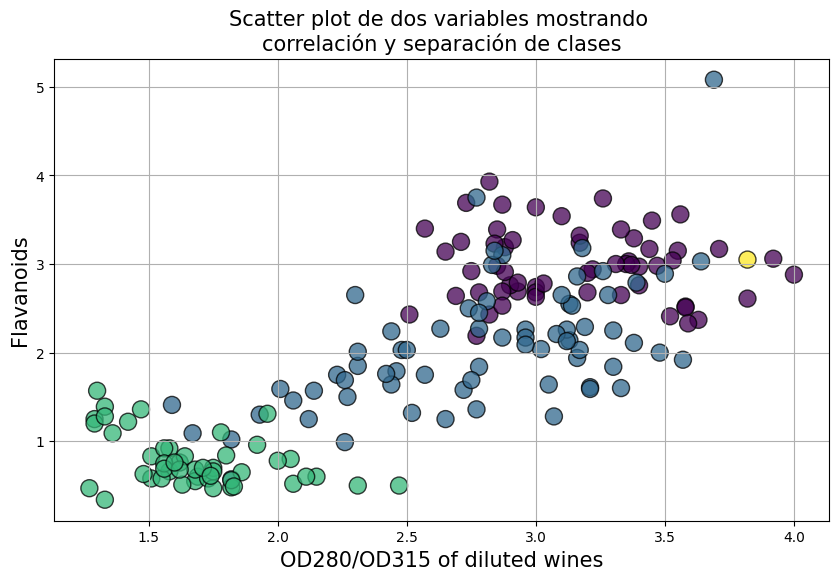

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

## Se toman los 3 mejores componentes

In [ ]:
nuevo_df_3C = df[['OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols']]
pca_3C = PCA(n_componentes=3)
pca_proyeccion_3C = pca_3C.run(nuevo_df_3C)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2]


In [ ]:
dfx_trans_3C = pd.DataFrame(data=pca_proyeccion_3C)
dfx_trans_3C.head(10)

,0,1,2
0,2.097919,0.800075,0.101507
1,1.372268,0.413501,0.021729
2,1.618906,-0.069818,-0.294601
3,2.959969,-0.778977,0.573132
4,1.101365,-0.237949,0.055284
5,1.893527,-0.891295,-0.087428
6,1.230382,0.797462,0.132793
7,1.316965,0.706288,0.232894
8,1.212615,-0.379868,-0.199400
9,2.028966,0.203332,0.071213


### Comprobación de que se esté tomando nuestro vino en el PCA

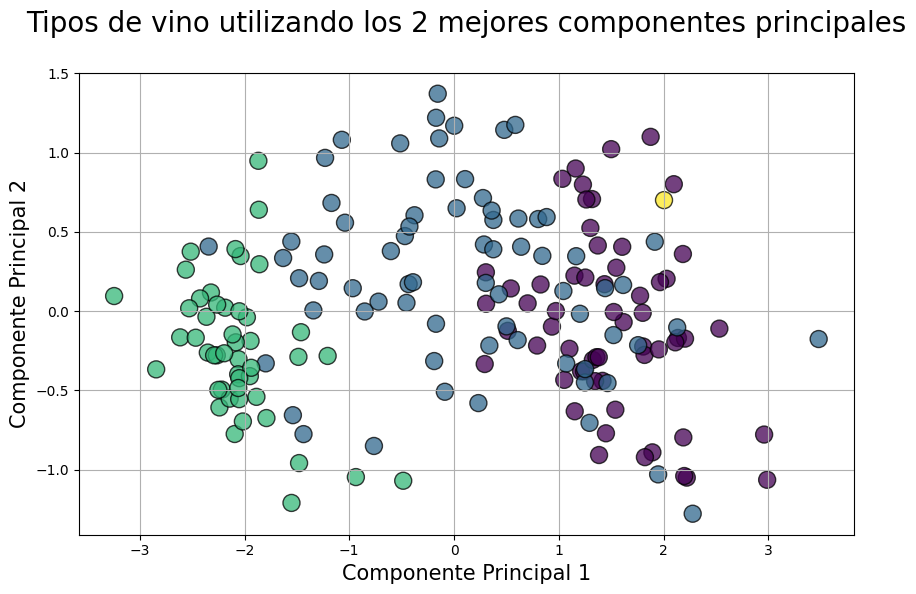

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 2 mejores componentes principales\n",fontsize=20)
plt.xlabel("Componente Principal 1",fontsize=15)
plt.ylabel("Componente Principal 2",fontsize=15)
plt.show()

## Se define la clase Kmeans

In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids
    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

## Uso del Kmean con 3 componentes ("OD280/OD315 of diluted wines", "Flavanoids", "Total phenols")

In [ ]:
# Uso de Kmean con 3 componentes
np.random.seed(42)
points_3C = dfx_trans_3C.values
print(points_3C.shape)
kmean_3C = KMeans(k=3)
labels_3C = kmean_3C.run(points_3C)
print(kmean_3C.centroids)


(179, 3)
[[-1.89003574 -0.12068211  0.01175895]
 [ 1.66259076 -0.14082828 -0.00417547]
 [ 0.19934804  0.35748229 -0.00985034]]


### Se dibuja el Kmean en 3D

In [ ]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('Componente principal 1')
    ax1.set_ylabel('Componente principal 2')
    ax1.set_zlabel('Componente principal 3')

    # Mi vino
    mi_vino = points[-1]  # Toma la última fila del Dataset
    ax1.scatter(mi_vino[0], mi_vino[1], mi_vino[2],
                c='red', edgecolors='black', s=135, label='Mi vino')

    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('Componente principal 1')
    ax2.set_ylabel('Componente principal 2')
    ax2.set_zlabel('Componente principal 3')
    ax2.legend()

        # Mi vino
    mi_vino = points[-1]  # Toma la última fila del Dataset
    ax2.scatter(mi_vino[0], mi_vino[1], mi_vino[2],
                c='red', edgecolors='black', s=135, label='Mi vino')

    ax2.legend()

    plt.tight_layout()
    plt.show()

### Resultados del Kmean

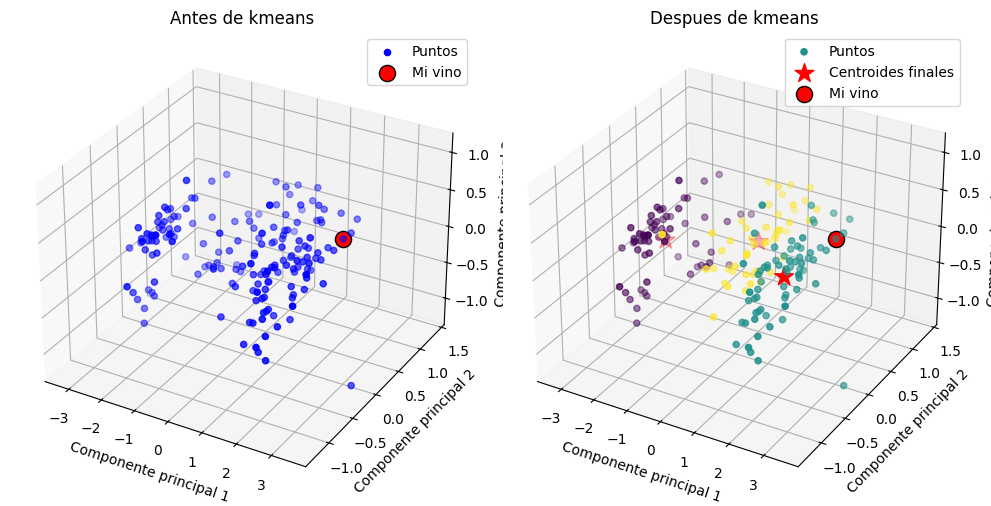

In [ ]:
dibujar3D(points_3C, kmean_3C.centroids, labels_3C)

## A cual tipo de vino pertenece?

 * El vino nuevo pertenece a la clase 1. Cabe recalcar que los colores de los clusters cambia en los kmeans.

#**Tips!**

*  Utilice solo los 3 mejores componentes para realizar su análisis.
*  Utilice kmean para realizar la asignación de tipos de vino

#**Preguntas de interpretación**

*  Cambian los resultados si utiliza los 2 **mejores** componentes?
*  Cambian los resultados si utiliza los 5 **mejores** componentes?
*  Cambian los resultados si utiliza los 3 **peores** componentes?

# ACTIVIDAD 2

## Se carga la matriz de correlación para elegir los componentes

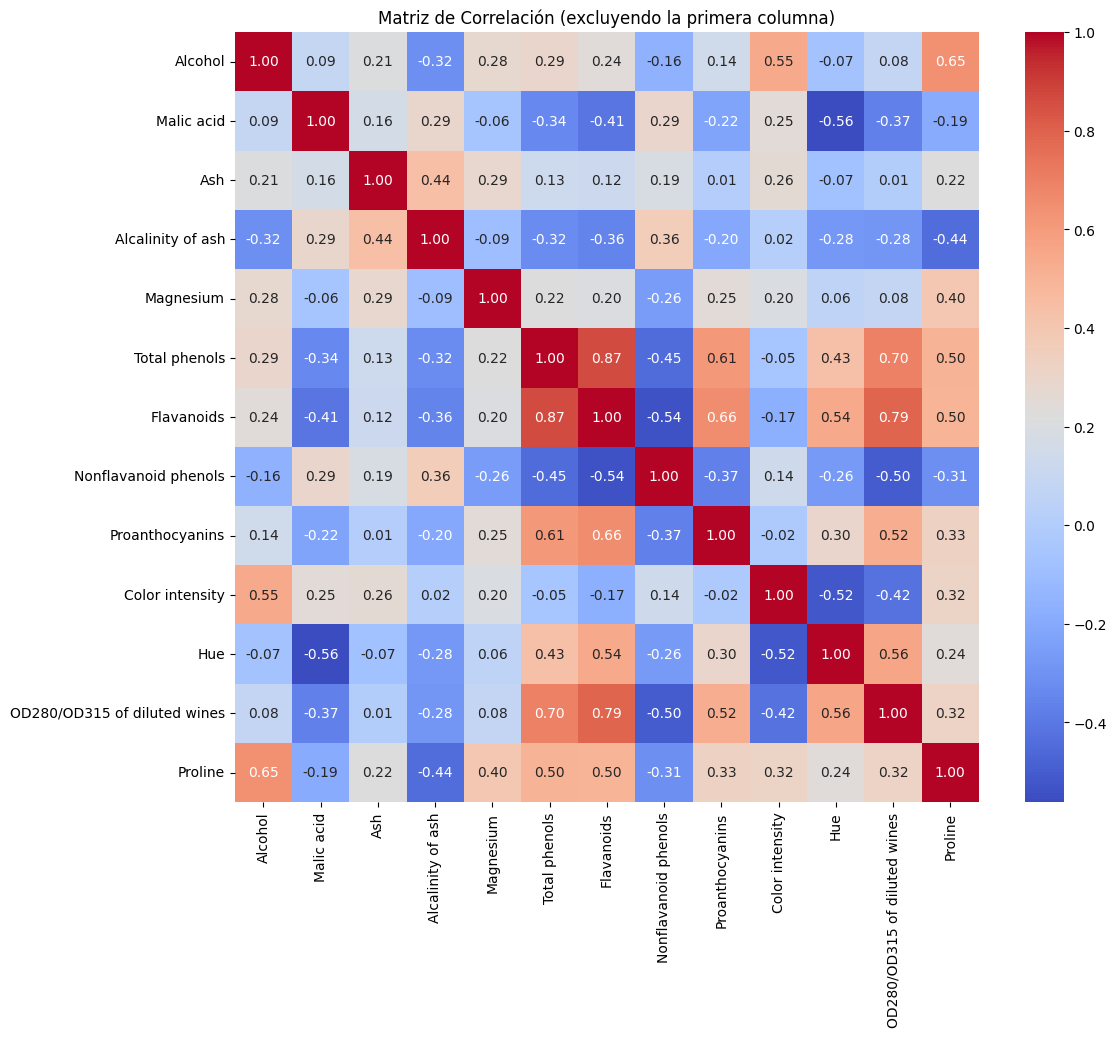

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()

## Se usan los 2 mejores componentes

In [ ]:
nuevo_df_2C = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca_2C = PCA(n_componentes=2)
pca_proyeccion_2C = pca_2C.run(nuevo_df)

dfx_trans_2C = pd.DataFrame(data=pca_proyeccion_2C)
dfx_trans_2C.head(10)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


,0,1
0,2.097919,0.800075
1,1.372268,0.413501
2,1.618906,-0.069818
3,2.959969,-0.778977
4,1.101365,-0.237949
5,1.893527,-0.891295
6,1.230382,0.797462
7,1.316965,0.706288
8,1.212615,-0.379868
9,2.028966,0.203332


### Kmean con 2 componentes

In [ ]:
# Uso de Kmean con 2 componentes
np.random.seed(42)
points_2C = dfx_trans_2C.values
print(points_2C.shape)
kmean_2C = KMeans(k=2)
labels_2C = kmean_2C.run(points_2C)
print(kmean_2C.centroids)

(179, 2)
[[-1.70049042 -0.07143164]
 [ 1.19844087  0.0503423 ]]


### Se dibuja el Kmean 2D

In [ ]:
def dibujar2D(points, centroids, labels):
    vino_nuevo = points[-1]  # Tomamos tu vino (última fila del dataset)

    plt.figure(figsize=(10, 5))

    # Primera gráfica: antes de aplicar K-Means
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.scatter(vino_nuevo[0], vino_nuevo[1], c='red', edgecolors='black', s=200, label='Mi vino')  # Resaltar tu vino
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Segunda gráfica: después de aplicar K-Means
    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.scatter(vino_nuevo[0], vino_nuevo[1], c='red', edgecolors='black', s=200, label='Mi vino')  # Resaltar tu vino
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Resultados del Kmean 2D

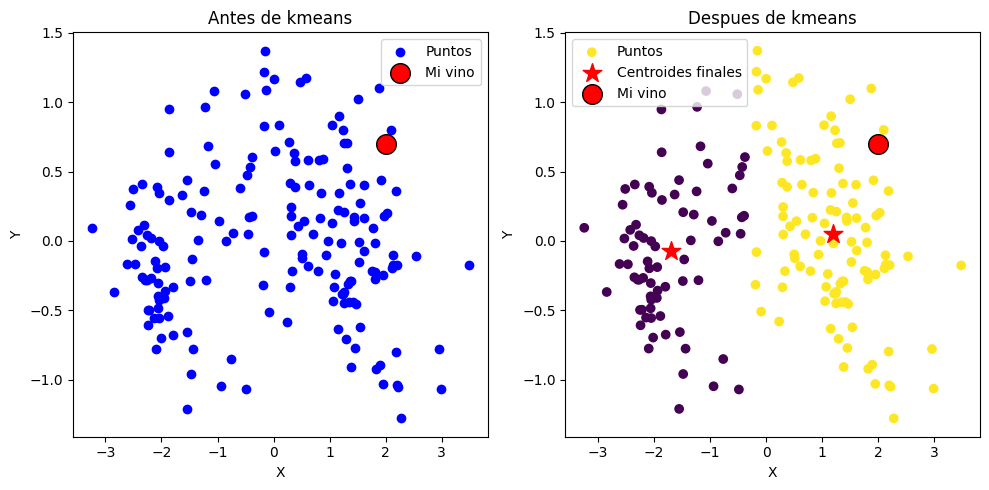

In [ ]:
dibujar2D(points_2C, kmean_2C.centroids, labels_2C)

## Cambian los resultados si utiliza los 2 mejores componentes?

* Al usar solo 2 componentes, usando un Kmean en 2D (2 Clusters) podemos notar que este contiene valores distintos, sin embargo la clase del vino seguiría siendo 1

## Se usan los 5 mejores componentes

In [ ]:
nuevo_df_5C = df[['OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols', 'Proanthocyanins', 'Proline']]
pca_5C = PCA(n_componentes=5)
pca_proyeccion_5C = pca_5C.run(nuevo_df_5C)

dfx_trans_5C = pd.DataFrame(data=pca_proyeccion_5C)
dfx_trans_5C.head(10)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2 3 4]


,0,1,2,3,4
0,-2.597887,-0.077154,-0.079764,0.866261,-0.183758
1,-1.241083,0.555440,-1.163669,0.274944,0.019287
2,-2.718943,0.400335,1.179695,0.443361,0.146341
3,-3.716068,1.317062,-0.197507,-0.505446,-0.574797
4,-1.086585,-0.350076,-0.083096,-0.345246,-0.019695
5,-2.635459,1.622839,0.029645,-0.470446,0.070430
6,-1.874950,0.915690,-0.152797,1.075020,-0.245621
7,-1.423179,1.217181,-1.264092,0.718516,-0.239433
8,-1.628941,0.496842,0.184391,-0.179794,0.180140
9,-2.210998,0.198886,-0.544077,0.157341,-0.064019


### Se crea un Kmean con 5 componentes

In [ ]:
# Uso de Kmean con 5 componentes
np.random.seed(42)
points_5C = dfx_trans_5C.values
print(points_5C.shape)
kmean_5C = KMeans(k=5)
labels_5C = kmean_5C.run(points_5C)
print(kmean_5C.centroids)



(179, 5)
[[-0.73224073 -0.5052388   2.01422928  0.10609173 -0.48433194]
 [-1.92406106  0.69930883 -0.15801794  0.07166305  0.01918638]
 [-1.47613044 -1.03204349  0.09771139 -0.2790811   0.08216257]
 [ 0.39902331 -0.86114053 -0.32237218  0.18642924  0.04673221]
 [ 2.19744929  0.36294705  0.13067648 -0.10832429 -0.03059582]]


### Se dibuja un kmean en 3D para representar los 5 componentes

In [ ]:
def dibujar3D_5C (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

        # Mi vino
    mi_vino = points[-1]  # Se toma la última fila del Dataset
    ax1.scatter(mi_vino[0], mi_vino[1], mi_vino[2],
                c='red', edgecolors='black', s=135, label='Mi vino')

    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

        # Mi vino
    mi_vino = points[-1]  # Se toma la última fila del Dataset
    ax2.scatter(mi_vino[0], mi_vino[1], mi_vino[2],
                c='red', edgecolors='black', s=135, label='Mi vino')

    ax2.legend()

    plt.tight_layout()
    plt.show()

### Resultados del Kmean en 3D para 5 componentes

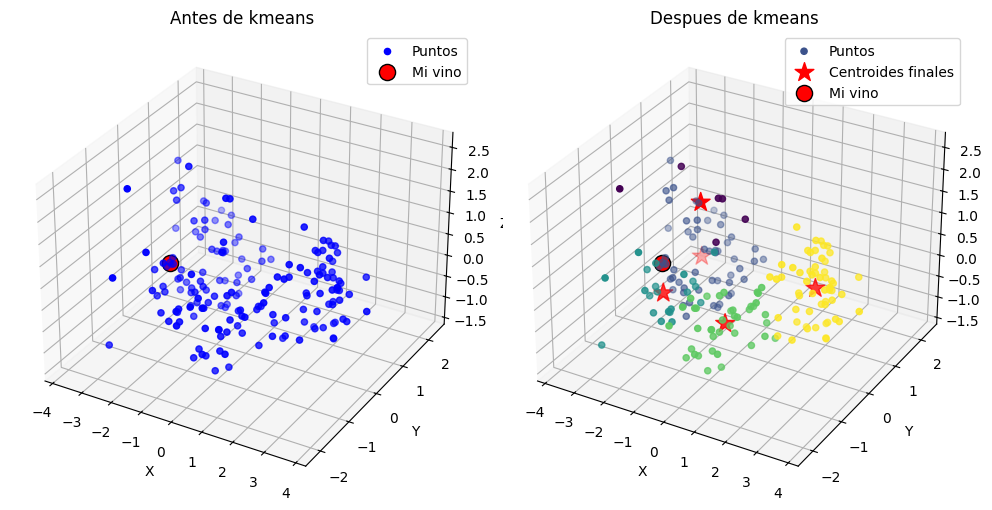

In [ ]:
dibujar3D_5C(points_5C, kmean_5C.centroids, labels_5C)

## Cambian los resultados si utiliza los 5 mejores componentes?

* Los resultados efectivamente cambian y esto lo podemos evidenciar en el Df y en el Kmean

## Se usan los 3 peores componentes

In [ ]:
nuevo_df_3Pc = df[['Alcalinity of ash', 'Malic acid', 'Magnesium']]
pca_3Pc = PCA(n_componentes=3)
pca_proyeccion_3Pc = pca_3Pc.run(nuevo_df_3Pc)

dfx_trans_3Pc = pd.DataFrame(data=pca_proyeccion_3Pc)
dfx_trans_3Pc.head(10)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 2 1]


,0,1,2
0,1.759106,1.438484,0.274488
1,2.017448,-0.533001,1.431524
2,0.186251,0.038336,0.197354
3,1.062305,0.636146,0.253658
4,-0.064044,1.332767,-0.280953
5,1.479362,0.444279,0.485177
6,1.182568,-0.609868,0.782420
7,0.957039,1.253213,0.156452
8,1.463832,-0.632333,0.761802
9,1.250929,-0.545450,0.145495


### Kmean para los 3 peores componentes

In [ ]:
# Uso de Kmean con los 3 peores componentes
np.random.seed(42)
points_3Pc = dfx_trans_3Pc.values
print(points_3Pc.shape)
kmean_3Pc = KMeans(k=3)
labels_3Pc = kmean_3Pc.run(points_3Pc)
print(kmean_3Pc.centroids)


(179, 3)
[[ 1.07928354  1.03976394 -0.00407892]
 [-1.27357526  0.38042629  0.38128443]
 [ 0.32887743 -0.72322635 -0.24484195]]


### Se dibuja el Kmean en 3D

In [ ]:
def dibujar3D_3Pc(points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    # Mi vino
    mi_vino = points[-1]
    ax2.scatter(mi_vino[0], mi_vino[1], mi_vino[2],
                c='red', edgecolors='black', s=135, label='Nuestro vino')

    ax2.legend()

    plt.tight_layout()
    plt.show()

### Resultados del Kmean en 3D para los 3 peores componentes

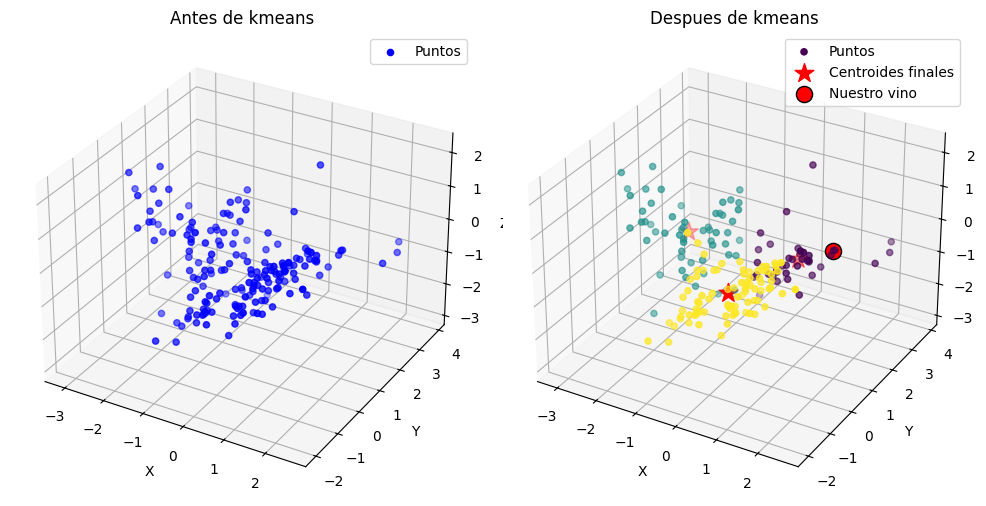

In [ ]:
dibujar3D_3Pc(points_3Pc, kmean_3Pc.centroids, labels_3Pc)

## Cambian los resultados si utiliza los 3 peores componentes?

* Usando los peores componentes podemos evidenciar que si hay cambios en el Df, tanto como en el Kmean. Incluso, los clusters del Kmean son diferentes.